In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
pd.set_option('display.max_columns',None)

In [2]:
data = pd.read_csv(r"C:\Users\Essam\Desktop\scrap price.csv")
data.head(10)

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [3]:
data.describe()


,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [4]:
data.nunique()

ID                  205
symboling             6
name                147
fueltypes             2
aspiration            2
doornumbers           2
carbody               5
drivewheels           3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [5]:
data = data.drop(["ID"],axis=1)

def Categorize_car_name(car_name):
  car_name = str(car_name).lower()
  if 'alfa-romero' in car_name:
    return 'alfa-romero'
  elif 'audi' in car_name:
    return 'audi'
  elif 'bmw' in car_name:
    return 'bmw'
  elif 'chevrolet' in car_name:
    return 'chevrolet'
  elif 'dodge' in car_name:
    return 'dodge'
  elif 'honda' in car_name:
    return 'honda'
  elif 'isuzu' in car_name:
    return 'isuzu'
  elif 'jaguar' in car_name:
    return 'jaguar'
  elif 'mazda' in car_name or 'maxda' in car_name:
    return 'mazda'
  elif 'buick' in car_name:
    return 'buick'
  elif 'mercury' in car_name:
    return 'mercury'
  elif 'mitsubishi' in car_name:
    return 'mitsubishi'
  elif 'nissan' in car_name:
    return 'nissan'
  elif 'peugeot' in car_name:
    return 'peugeot'
  elif 'plymouth' in car_name:
    return 'plymouth'
  elif 'porsche' in car_name or 'porcshce' in car_name:
    return 'porsche'
  elif 'renault' in car_name:
    return 'renault'
  elif 'saab' in car_name:
    return 'saab'
  elif 'subaru' in car_name:
    return 'subaru'
  elif 'toyota' in car_name:
    return 'toyota'
  elif 'toyota' in car_name:
    return 'toyota'
  elif 'volkswagen' in car_name or 'vw' in car_name:
    return 'volkswagen'
  elif 'volvo' in car_name:
    return 'volvo'
data["name"] = data["name"].apply(Categorize_car_name)  

In [6]:
data=pd.get_dummies(data,columns=["name","symboling","fueltypes","aspiration","doornumbers","carbody","drivewheels"
                                  ,"enginelocation","enginetype","cylindernumber","fuelsystem"],drop_first=True)

In [7]:
cols = data.shape[1]
col=data.pop("price")
data.insert(cols-1,col.name,col)

In [8]:
# rescaling data
data[["wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke",
      "compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]]=StandardScaler().fit_transform(data[["wheelbase","carlength","carwidth","carheight","curbweight",
                                                                                                                      "enginesize","boreratio","stroke", "compressionratio"
                                                                                                                      ,"horsepower","peakrpm","citympg","highwaympg","price"]])
data

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,name_audi,name_bmw,name_buick,name_chevrolet,name_dodge,name_honda,name_isuzu,name_jaguar,name_mazda,name_mercury,name_mitsubishi,name_nissan,name_peugeot,name_plymouth,name_porsche,name_renault,name_saab,name_subaru,name_toyota,name_volkswagen,name_volvo,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltypes_gas,aspiration_turbo,doornumbers_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheels_fwd,drivewheels_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,price
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.027391
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.404461
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.404461
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.084485
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.523668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.721873,1.198549,1.398245,0.728239,0.763241,0.339248,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.340094,-0.400490,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.447752
201,1.721873,1.198549,1.351515,0.728239,0.949992,0.339248,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.953012,-0.837195,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.723810
202,1.721873,1.198549,1.398245,0.728239,0.878757,1.109571,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.106241,-1.128332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1.029983
203,1.721873,1.198549,1.398245,0.728239,1.273437,0.435538,-1.183483,0.462183,3.244916,0.047732,-0.683286,0.119594,-0.546059,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1.153582


In [9]:
x_train = data.iloc[:,0:cols-1]
y_train = data.iloc[:,cols-1:cols]
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
predicted_values = model.predict(x_train)
r_squared = r2_score(y_train, predicted_values)
rmse = np.sqrt(mean_squared_error(y_train, predicted_values))

print('R-squared:', r_squared)
print('RMSE:', rmse)

R-squared: 0.9658113230740256
RMSE: 0.1849018034686908


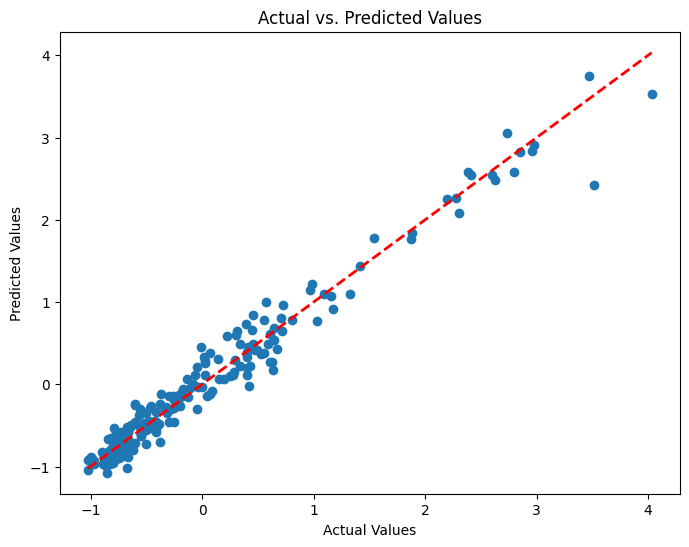

In [11]:
#Plot the predicted values against the actual values
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_train, predicted_values)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Actual vs. Predicted Values')
plt.show()